# Image Classification with Pre-trained Deep Learning Models

[Keras] provides pre-trained deep learning models which can be utilised in analysing and training our models.  We will just load one that suits our needs and use it to classify our images.

[keras]: https://keras.io/applications/#resnet50

# ResNet50 *vs* InceptionV3 *vs* Xception
Analyse the performance of three pretrained deep learning models implmented for [Keras].

The models, [ResNet50], [InceptionV3] and [Xception], are all pre-trained on the [ImageNet] dataset.  Here we initialize them and plot a few images from our ImageNetDogs's image set and the probability of their top classifications.

**[ImageNet]** is a research project to develop a large image dataset with annotations, such as standard labels and descriptions.  The dataset has been used in the annual [ILSVRC] image classification challenge.

[resnet50]: https://keras.io/applications/#resnet50
[VGG16]: https://keras.io/applications/#vgg16
[Xception]: https://keras.io/applications/#xception
[InceptionV3]: https://keras.io/applications/#inceptionv3
[Keras]: https://keras.io/applications/
[ImageNet]: http://www.image-net.org/
[ILSVRC]: http://image-net.org/challenges/LSVRC/2017/index

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from PIL import Image

In [2]:
import numpy as np
from tensorflow.keras.preprocessing import image
import tensorflow.keras.applications.resnet50 as resnet50
import tensorflow.keras.applications.xception as xception
import tensorflow.keras.applications.inception_v3 as inception_v3

In [30]:
import warnings
warnings.filterwarnings(action="ignore")

In [31]:
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
%matplotlib inline

In [4]:
resnet_model = resnet50.ResNet50(weights='imagenet')
inception_model = inception_v3.InceptionV3(weights='imagenet')
xception_model = xception.Xception(weights='imagenet')

91889664/91884032 [==============================] - 55s 1us/step


In [5]:
def image_classify(model, pak, img, top_n=3):
    """Classify image and return top matches."""
    target_size = (224, 224)
    if img.size != target_size:
        img = img.resize(target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = pak.preprocess_input(x)
    preds = model.predict(x)
    return pak.decode_predictions(preds, top=top_n)[0]


def plot_preds(img, preds_arr):
    """Plot image and its prediction."""
    sns.set_color_codes('pastel')
    f, axarr = plt.subplots(1, len(preds_arr) + 1, figsize=(20, 5))
    axarr[0].imshow(img)
    axarr[0].axis('off')
    for i in range(len(preds_arr)):
        _, x_label, y_label = zip(*(preds_arr[i][1]))
        plt.subplot(1, len(preds_arr) + 1, i + 2)
        ax = sns.barplot(np.array(y_label), np.array(x_label))
        plt.xlim(0, 1)
        ax.set()
        plt.xlabel(preds_arr[i][0])
    plt.show()


def classify_and_plot(image_path):
    """Classify an image with different models.
    Plot it and its predicitons.
    """
    img = Image.open(image_path)
    resnet_preds = image_classify(resnet_model, resnet50, img)
    xception_preds = image_classify(xception_model, xception, img)
    inception_preds = image_classify(inception_model, inception_v3, img)
    preds_arr = [('Resnet50', resnet_preds), ('xception', xception_preds), ('Inception', inception_preds)]
    plot_preds(img, preds_arr)

In [9]:
images_dir = "../data/raw/images/Images/n02085620-Chihuahua/"

In [10]:
image_files = [x.path for x in os.scandir(images_dir)]

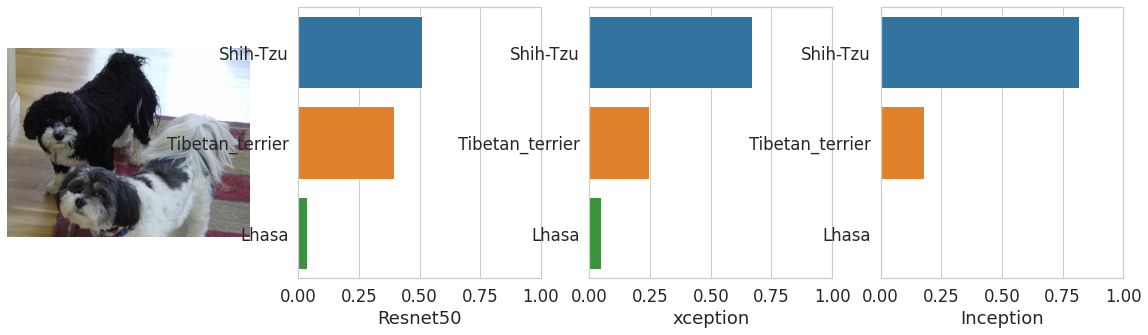

In [32]:
classify_and_plot(image_files[10])

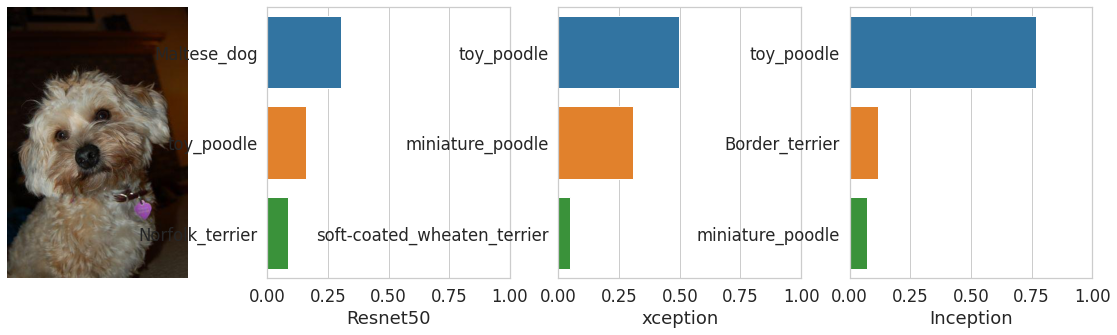

In [33]:
classify_and_plot(image_files[11])

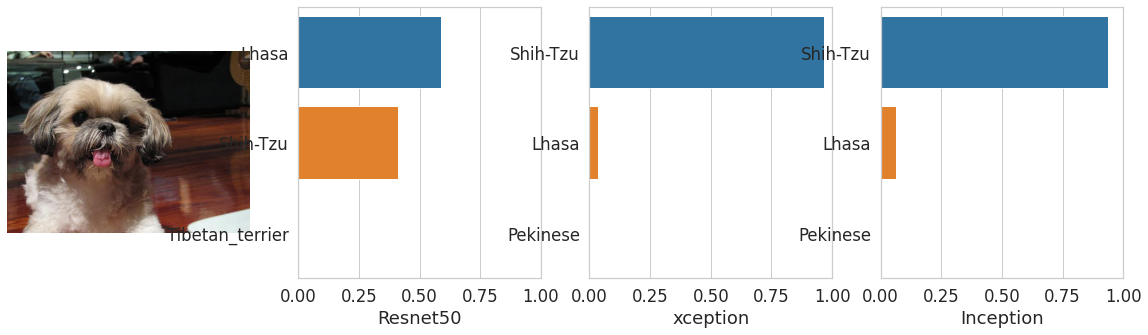

In [34]:
classify_and_plot(image_files[12])

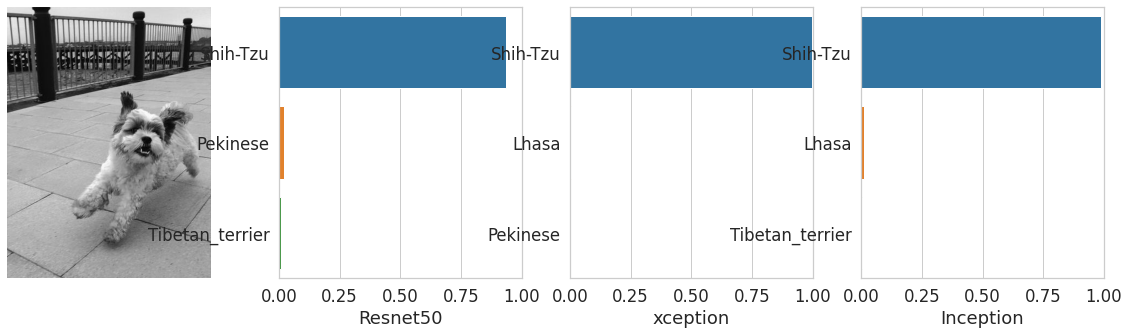

In [35]:
classify_and_plot(image_files[13])

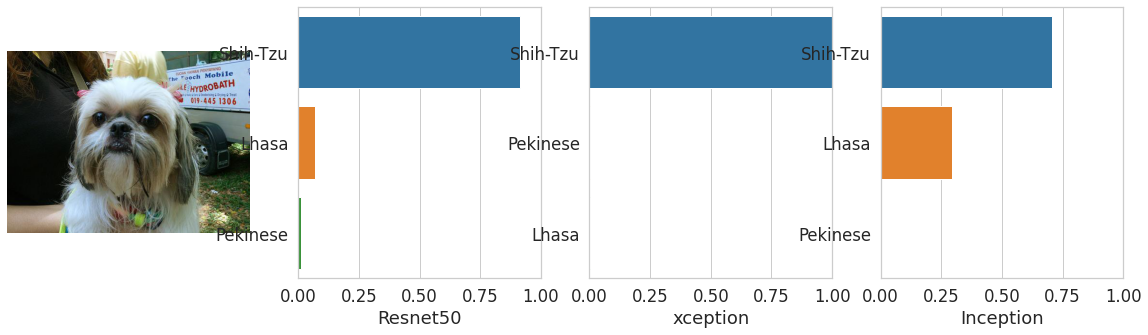

In [36]:
classify_and_plot(image_files[14])

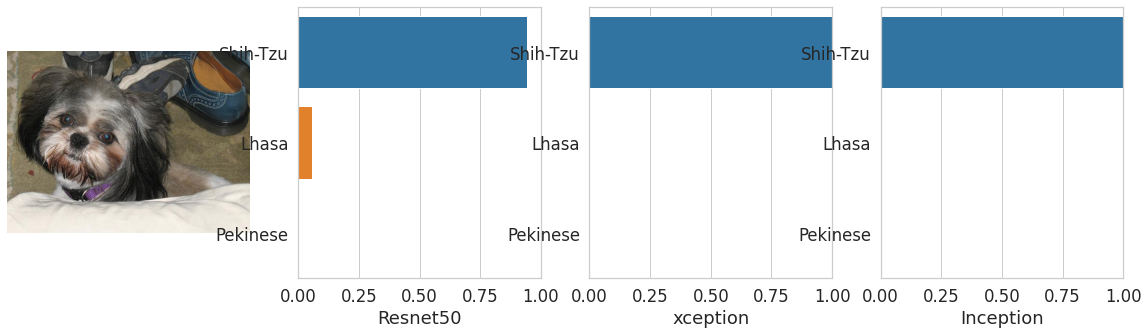

In [37]:
classify_and_plot(image_files[15])

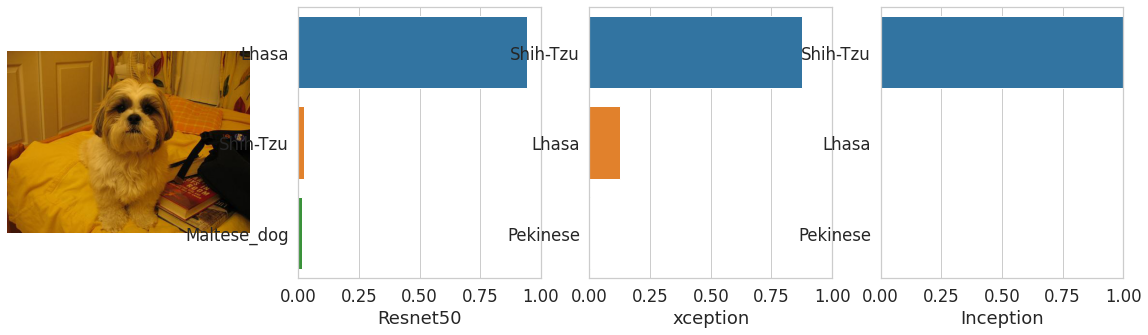

In [38]:
classify_and_plot(image_files[16])

In [39]:
images_dir = "../data/raw/images/Images/n02086240-Shih-Tzu/"
image_files = [x.path for x in os.scandir(images_dir)]

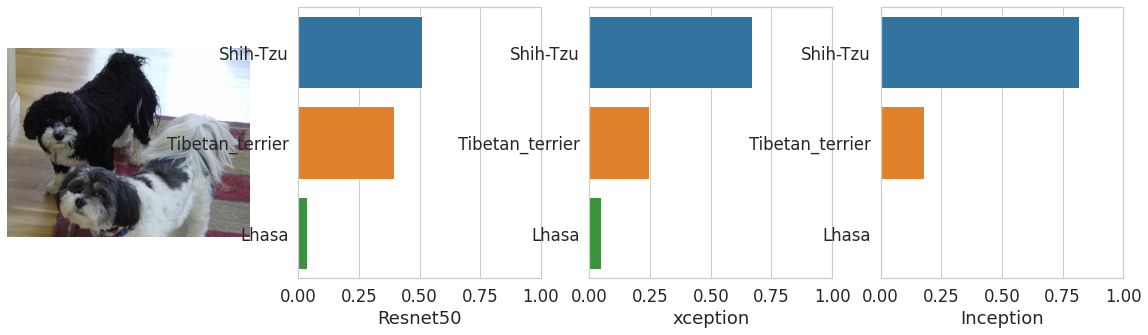

In [40]:
classify_and_plot(image_files[10])

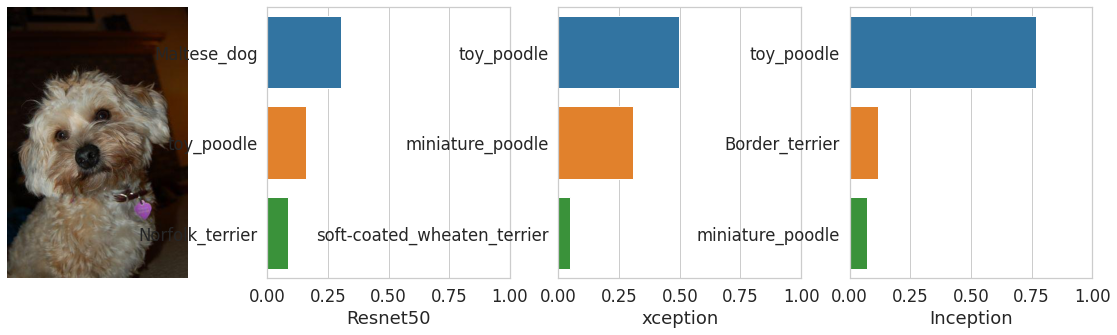

In [41]:
classify_and_plot(image_files[11])

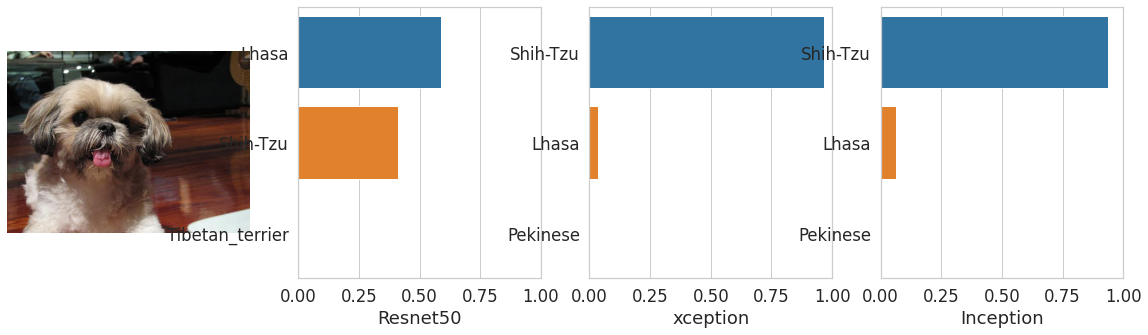

In [42]:
classify_and_plot(image_files[12])

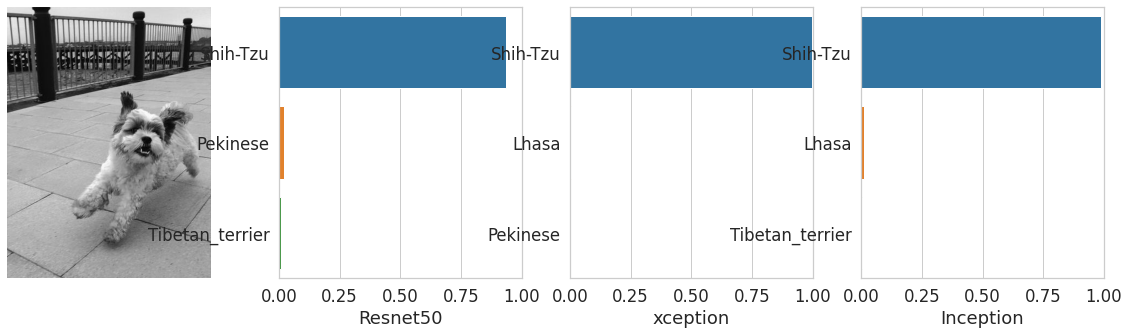

In [43]:
classify_and_plot(image_files[13])

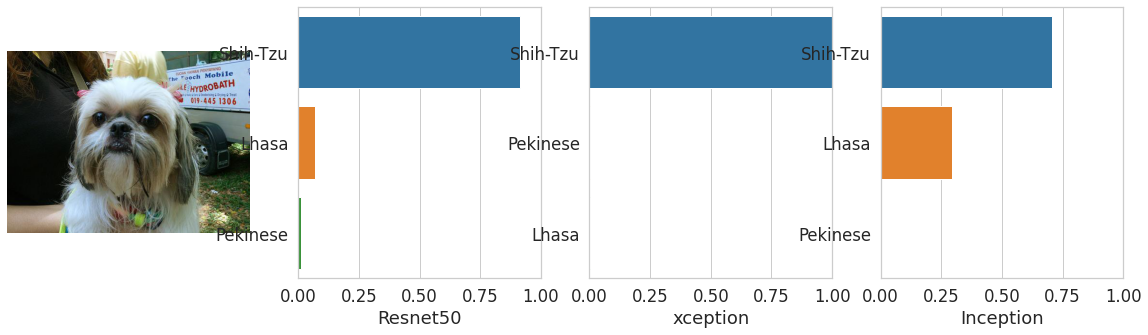

In [44]:
classify_and_plot(image_files[14])

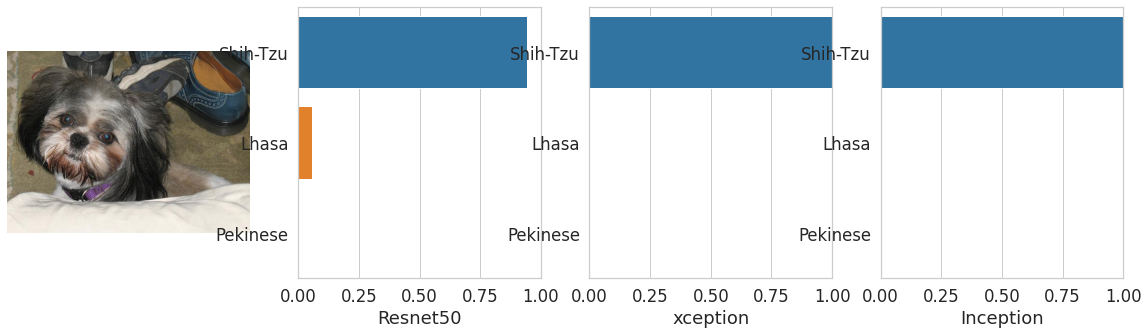

In [45]:
classify_and_plot(image_files[15])

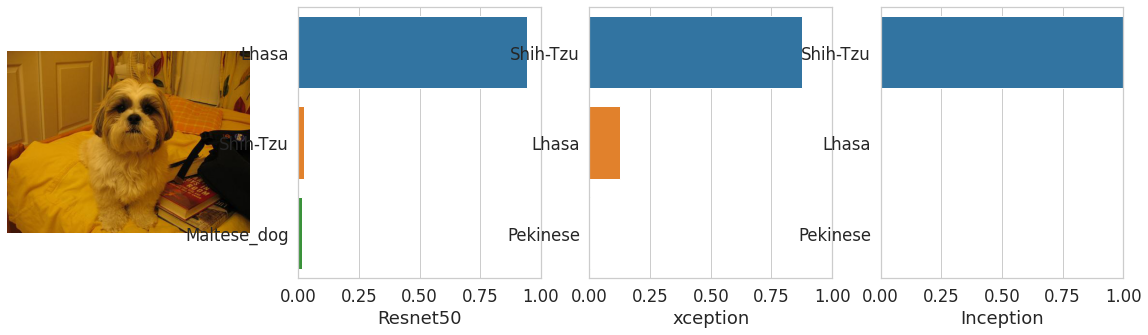

In [46]:
classify_and_plot(image_files[16])